In [1]:
import numpy as np
import pandas as pd
import glob as gb
import re
import matplotlib.pyplot as plt
import pprint as pp
import os
from scipy import signal
from cycler import cycler

%matplotlib notebook

In [2]:
# Dataframe initialise
files = gb.glob('./Spectrum/PlottingData/*.txt')

def getSample(file):
    # Sample
    sample = os.path.basename(file)
    sample = os.path.splitext(sample)[0]
    return sample

def getSampleNo(file):
    # Sample
    sample = os.path.basename(file)
    sample = os.path.splitext(sample)[0]
    # For files with underscore
    sample = sample.split('_')[0]
    return int(sample[1:])

# Get samples from file names
sample_list=[getSample(x) for x in files]

# Index
index = [int(x[1:]) for x in sample_list]

d = {'sample' : sample_list}

df = pd.DataFrame(d, index=index)
df.sort_index(inplace=True)
df = df.set_index('sample')

In [3]:
# Create colormap for plotting
n = len(sample_list) # Number of colors
new_colors = [plt.get_cmap('jet')(1. * i/n) for i in range(n)]
plt.rc('axes', prop_cycle=(cycler('color', new_colors)))

# Spectrum

In [24]:
# Add spectrum data to df
imax = []
itot = []
sample = []
for f in files:
    
    # Load data
    spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
    wavelength = spectrumData[:,0]
    intensity = spectrumData[:,1]
    
    # Store max intensity to dataframe
    imax.append(max(intensity))
    itot.append(sum(intensity))
    sample.append(getSample(f))


df['MaxIntensity'] = pd.Series(imax, index=sample)  
df['TotalIntensity'] = pd.Series(itot, index=sample)

<IPython.core.display.Javascript object>


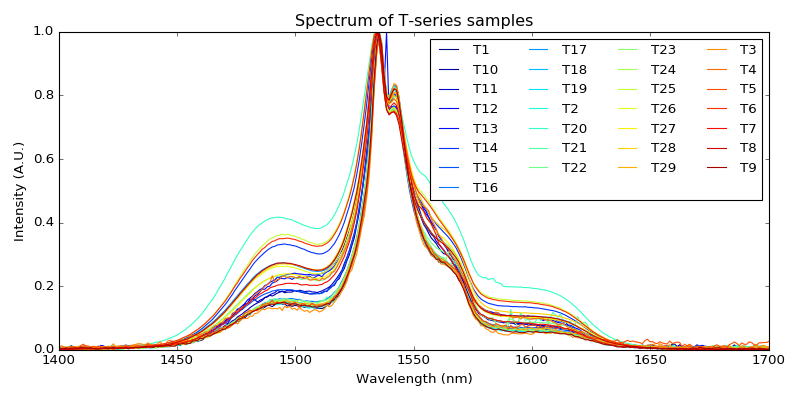

In [25]:
# Plot all spectrum
fig, ax = plt.subplots(figsize=(10,5))

for f in files:
    # Load data
    spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
    wavelength = spectrumData[:,0]
    intensity = spectrumData[:,1]
    
    # Normalise
    intensity -= min(intensity)
    intensity /= max(intensity)
    
    ax.plot(wavelength, intensity, label=getSample(f))
    
plt.xlim(min(wavelength),max(wavelength))
plt.legend(prop={'size': 12}, ncol=4, loc='best')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (A.U.)')
plt.title('Spectrum of T-series samples')
plt.tight_layout()
plt.savefig('all_spectrum.png', dpi=500)

<IPython.core.display.Javascript object>


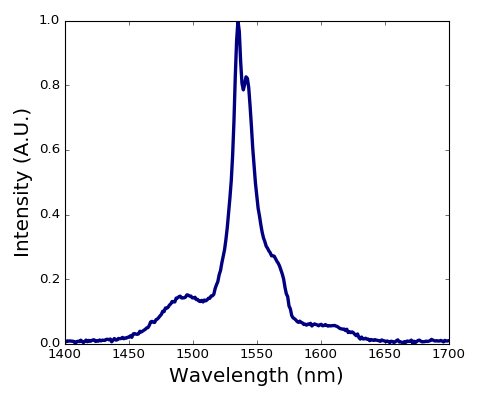

165300.0


In [15]:
# Plot single Spectrum data file
a = ['T2.']

# Plot data
fig = plt.figure(figsize=(6,5))
ax = plt.subplot(111)

# Set colour cycle for lines
n = len(a) # Number of colors
new_colors = [plt.get_cmap('jet')(1. * i/n) for i in range(n)]
ax.set_prop_cycle(cycler('color', new_colors))

for f in files:
    if any(x in f for x in a):
        # Load data
        spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
        wavelength = spectrumData[:,0]
        intensity = spectrumData[:,1]
        
        print(max(intensity))
#         Normalise
        intensity -= min(intensity)
        intensity /= max(intensity)
        
        ax.plot(wavelength, intensity, label=getSample(f), linewidth=3)
        peakind = signal.find_peaks_cwt(intensity,np.arange(1,10))

# plt.legend()
plt.xlabel('Wavelength (nm)', fontsize=18)
plt.ylabel('Intensity (A.U.)', fontsize=18)
plt.yticks(fontsize=12); plt.xticks(fontsize=12)
plt.xlim(min(wavelength),max(wavelength))
plt.tight_layout()
plt.savefig('spectrum_T2.pdf', dpi=300)

In [48]:
# Find FWHM
np.where(np.around(intensity, 1)==0.5)

(array([123, 124, 142, 143], dtype=int64),)

In [51]:
print('FWHM is {:.2f} nm'.format(abs(wavelength[123]-wavelength[142])))

FWHM is 19.95 nm


In [11]:
# Find peaks and FWHM... still need to implement
wavelength[peakind]

array([ 1410.45,  1487.1 ,  1539.6 ,  1613.1 ,  1690.8 ])

# Plot Lifetimes

In [7]:
# Lifetime function
from scipy.optimize import curve_fit

def model_func(t, a, b, c):
    return a*np.exp(-t/b)+c

def getLifetime(time, intensity, f):
    try:
        guess = [max(intensity), 10, min(intensity)]
        popt, pcov = curve_fit(model_func, time, intensity, guess)
        return popt[1]
    except:
        print(f + ' did not fit a single exp :(')
        return np.NaN

In [20]:
# select files to analyse
pump = 100  # ms

files = gb.glob('./Lifetime/*.txt')
# Remove certain files from list (depending on what pump you want)
# files = [ x for x in files if '_' not in x ]  # For 100us pump
files = [ x for x in files if '_100ms' in x ]

files = sorted(files, key=lambda x: getSampleNo(x))
files

['./Lifetime\\T1_100ms.txt',
 './Lifetime\\T2_100ms.txt',
 './Lifetime\\T3_100ms.txt',
 './Lifetime\\T4_100ms.txt',
 './Lifetime\\T5_100ms.txt',
 './Lifetime\\T6_100ms.txt',
 './Lifetime\\T7_100ms.txt',
 './Lifetime\\T8_100ms.txt',
 './Lifetime\\T9_100ms.txt',
 './Lifetime\\T10_100ms.txt',
 './Lifetime\\T11_100ms.txt',
 './Lifetime\\T12_100ms.txt',
 './Lifetime\\T13_100ms.txt',
 './Lifetime\\T14_100ms.txt',
 './Lifetime\\T15_100ms.txt',
 './Lifetime\\T16_100ms.txt',
 './Lifetime\\T17_100ms.txt',
 './Lifetime\\T18_100ms.txt',
 './Lifetime\\T19_100ms.txt',
 './Lifetime\\T20_100ms.txt',
 './Lifetime\\T21_100ms.txt',
 './Lifetime\\T22_100ms.txt',
 './Lifetime\\T23_100ms.txt',
 './Lifetime\\T24_100ms.txt',
 './Lifetime\\T25_100ms.txt',
 './Lifetime\\T26_100ms.txt',
 './Lifetime\\T27_100ms.txt',
 './Lifetime\\T28_100ms.txt',
 './Lifetime\\T29_100ms.txt']

## Plot decay

<IPython.core.display.Javascript object>


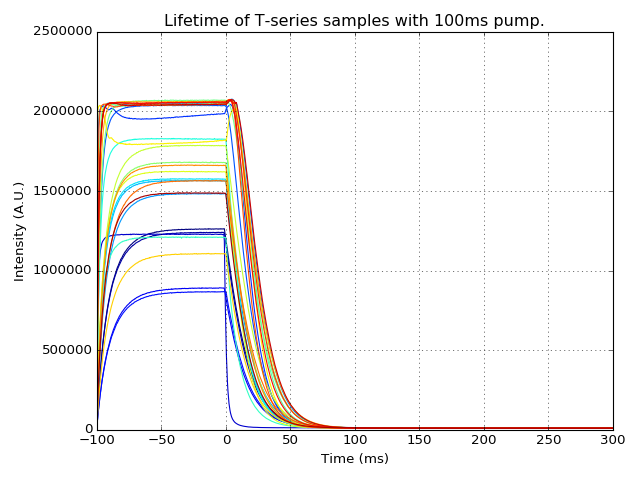

In [35]:
# Plot data
fig, ax = plt.subplots()

for f in files:
    # Load data
    spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=10, usecols=(0,1))
    time = spectrumData[:,0]/1E6  # Convert to ms
    intensity = spectrumData[:,1]
    
    # Normalise
#     intensity -= min(intensity)
#     intensity /= max(intensity)

    # Shift time axis to account for the pump
    time -= pump

    # Optional: drop the data before the pump
#     ind = np.where(time>=0)
#     time = time[ind]
#     intensity = intensity[ind]
    
    ax.plot(time, intensity, label=getSample(f))

# plt.legend(prop={'size': 12}, ncol=4, loc='best')
# plt.xlim(0, 40)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')
plt.title('Lifetime of T-series samples with %sms pump.' % pump)
plt.tight_layout()
plt.grid()
    

# # Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
# plt.legend(ncol=2, loc='center left', bbox_to_anchor=(1, 0.5))

# fig.savefig('lifetime.png')

<IPython.core.display.Javascript object>


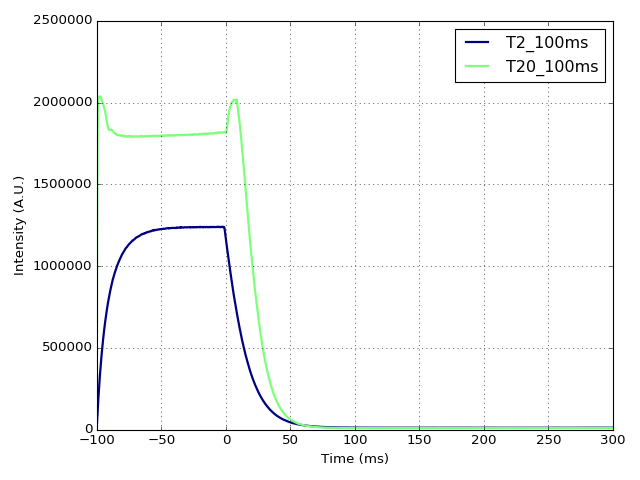

In [56]:
# Plot data for select sweeps
a = ['T4_', 'T6_', 'T8_', 'T15_', 'T20_', 'T22', 'T25', 'T28']

fig, ax = plt.subplots()
# Set colour cycle for lines
n = len(a) # Number of colors
new_colors = [plt.get_cmap('jet')(1. * i/n) for i in range(n)]
ax.set_prop_cycle(cycler('color', new_colors))

for f in files:
    if any(x in f for x in ['T2_', 'T20']):
        # Load data
        spectrumData = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=10, usecols=(0,1))
        time = spectrumData[:,0]/1E6  # Convert to ms
        intensity = spectrumData[:,1]
        
#         Normalise
#         intensity -= min(intensity)
#         intensity /= max(intensity)

        # Shift time axis to account for the pump
        time -= pump
        
        # Optional: drop the data before the pump
#         ind = np.where(time>=0)
#         time = time[ind]
#         intensity = intensity[ind]
        
        ax.plot(time, intensity, label=getSample(f), lw=2)

plt.legend(loc='best')
# plt.xlim(0, 30)
# plt.ylim(0.1, 1)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')
# plt.title('Lifetime of T-series samples with %sms pump.' % pump)
plt.tight_layout()
plt.grid()
plt.savefig('lifetime_t2.png', dpi=500)

# Pandas Dataframe

In [48]:
# Fit lifetime and add to dataframe
tau = []
sample = []
for f in files:
    data = np.genfromtxt(fname=f, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
    time = data[:,0]/1E6  # Convert to ms
    intensity = data[:,1]
    
    # Sample
    sample.append(getSample(f))

    # Normalise
    intensity -= min(intensity)
    intensity /= max(intensity)

    # Shift time axis to account for the pump
    time -= 2*pump

    # Optional: drop the data before the pump
    ind = np.where(time>=0)
    time = time[ind]
    intensity = intensity[ind]
    
    tau.append(getLifetime(time, intensity, f))

df['Lifetime'] = pd.Series(tau, index=sample)  

In [49]:
df.head()

,MaxIntensity,TotalIntensity,Lifetime
sample,,,
T1,168200.0,15500290.0,12.582230
T2,165300.0,15583850.0,12.478841
T3,132600.0,14499530.0,12.041918
T4,160600.0,16723680.0,1.541385
T5,119400.0,14065800.0,12.971974


In [54]:
# Save Dataframe
df.to_csv('Spectrum_dataframe.csv')
# To load
# pd.read_csv('dataframe.csv', index_col=0) 